# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')

In [3]:
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
previsao_renda.describe()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,7499.500000,8298.753467,0.437267,43.84140,7.750462,2.219067,4624.632946
std,4330.271354,4800.904442,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,0.000000,0.000000,22.00000,0.191781,1.000000,159.900000
25%,3749.750000,4111.750000,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,7499.500000,8330.500000,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,11249.250000,12469.000000,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14999.000000,16649.000000,14.000000,68.00000,42.906849,15.000000,89918.040000


In [16]:
interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
previsao_renda[interesse]

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
0,False,True,1,36,8682,3369.24
1,True,True,0,42,12830,6096.14
2,True,True,2,31,2885,5658.98
3,True,False,0,50,16168,7246.69
4,False,False,0,52,12438,4017.37
...,...,...,...,...,...,...
14995,True,True,1,37,3678,1193.29
14996,True,True,1,30,3405,2519.18
14997,True,True,0,40,7944,1586.85
14998,False,True,0,47,16019,6975.39


In [18]:
previsao_renda[interesse].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000


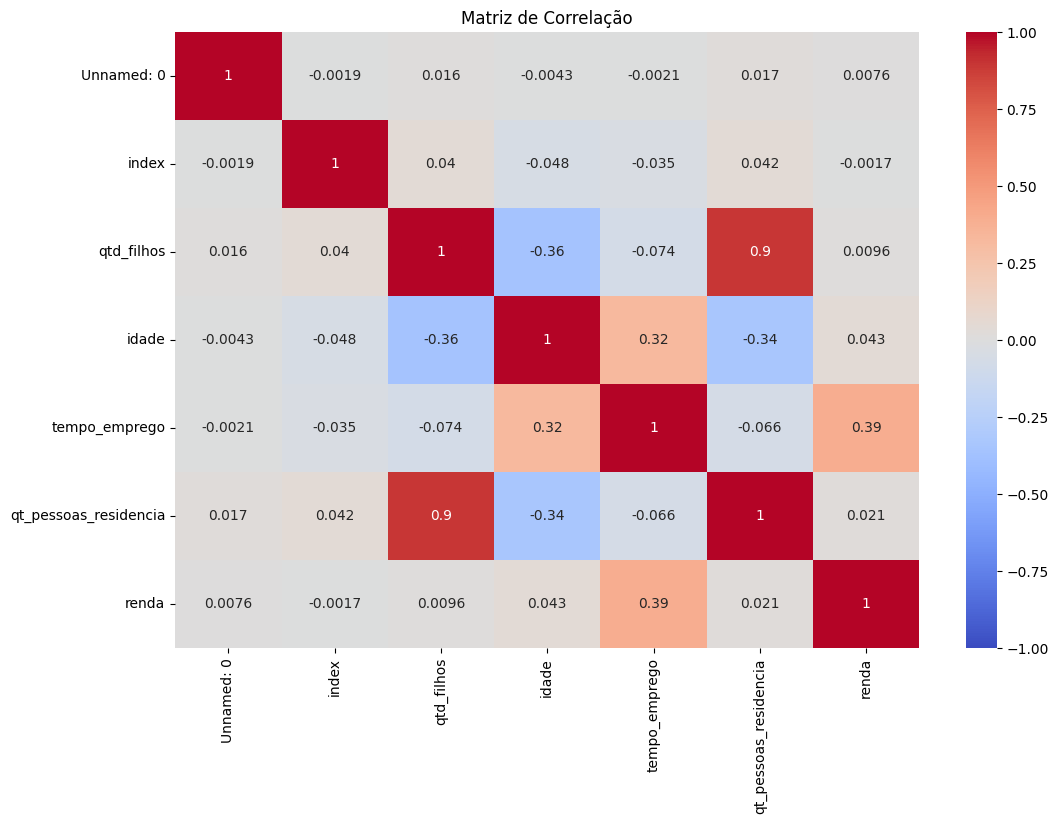

In [25]:
numeric_cols = previsao_renda.select_dtypes(include=[float, int]).columns
correlation_matrix = previsao_renda[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

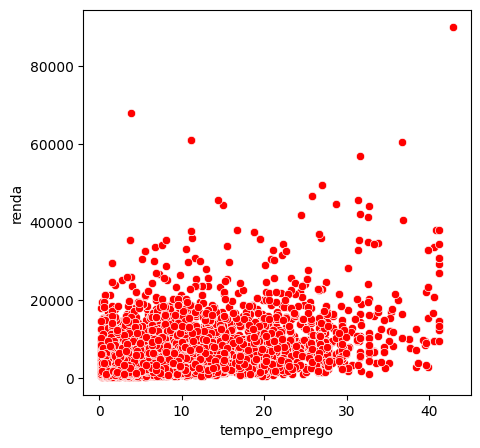

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=previsao_renda['renda'], color='red');
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.show()

Concentração de pontos: A maioria dos pontos está concentrada na parte inferior esquerda do gráfico. Isso indica que a maioria das pessoas tem um tempo de emprego e uma renda relativamente baixos.

Correlação: Não parece haver uma correlação forte entre ‘renda’ e ‘tempo_emprego’. Em outras palavras, o tempo de emprego de uma pessoa não parece ter uma influência direta sobre a sua renda.

Outliers: Há um ponto notável no canto superior direito do gráfico. Este ponto representa uma pessoa com um alto tempo de emprego e uma alta renda. Este é um outlier e não representa a tendência geral dos dados

3) Na sua aopinião, há outliers na variável renda?

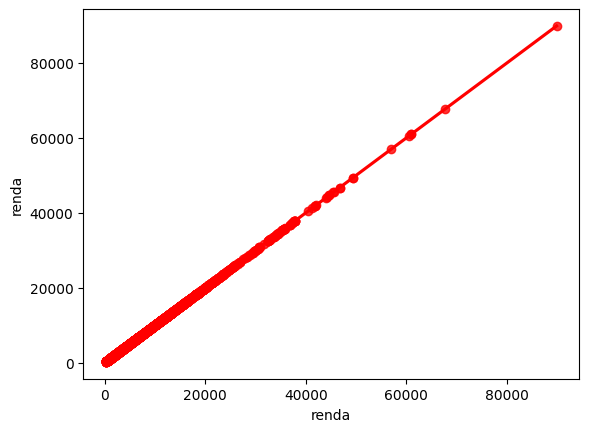

In [12]:
sns.regplot(x=previsao_renda['renda'], y=previsao_renda['renda'], color='red');

Com base no gráfico de dispersão, não parece haver outliers na variável ‘venda’. Todos os pontos parecem seguir uma tendência linear positiva sem desvios significativos.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [30]:
correlations_with_renda = correlation_matrix['renda'].abs().sort_values(ascending=False)

top2_vars = correlations_with_renda.index[1:3]

previsao_renda['log_renda'] = np.log(previsao_renda['renda'] + 1)

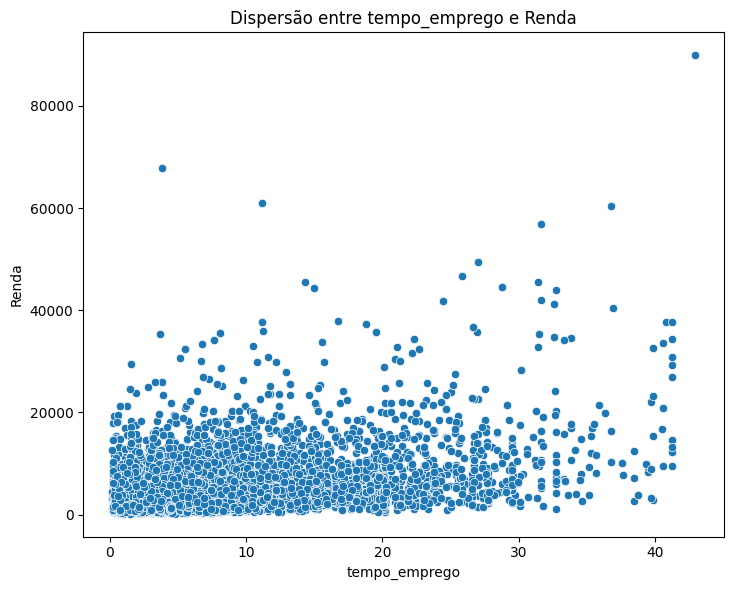

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=previsao_renda[top2_vars[0]], y=previsao_renda['renda'])
plt.title(f'Dispersão entre {top2_vars[0]} e Renda')
plt.xlabel(top2_vars[0])
plt.ylabel('Renda')

plt.tight_layout()
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

 aplicação do logaritmo parece ter linearizado a relação entre ‘renda’ e ‘tempo_emprego’, bem como entre ‘renda’ e ‘idade’. Isso é evidente a partir da formação de uma linha reta clara nos gráficos após a aplicação do logaritmo.